In [1]:
# Corrected versión of imports to guarantee a Tensorflow backend
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import tensorflow.keras.backend as K

from tqdm.keras import TqdmCallback

Using TensorFlow backend.


In [ ]:
# Original series - Prices from 2015 to 2017 were of little use to make a 
# good prediction of gold prices on the second half of year 2020
# df = pd.read_csv('Precio_2015_2020.csv')

In [2]:
# New price series
df = pd.read_csv('Precio_2017_2020.csv')

In [3]:
# Data dimensions
df.shape

(955, 2)

In [4]:
# Required data transforms
df.columns = ['date', 'price']
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df.head()

,price
date,
2017-01-02,1145.9
2017-01-03,1151.0
2017-01-04,1164.3
2017-01-05,1176.7
2017-01-06,1175.9


<AxesSubplot:xlabel='date'>

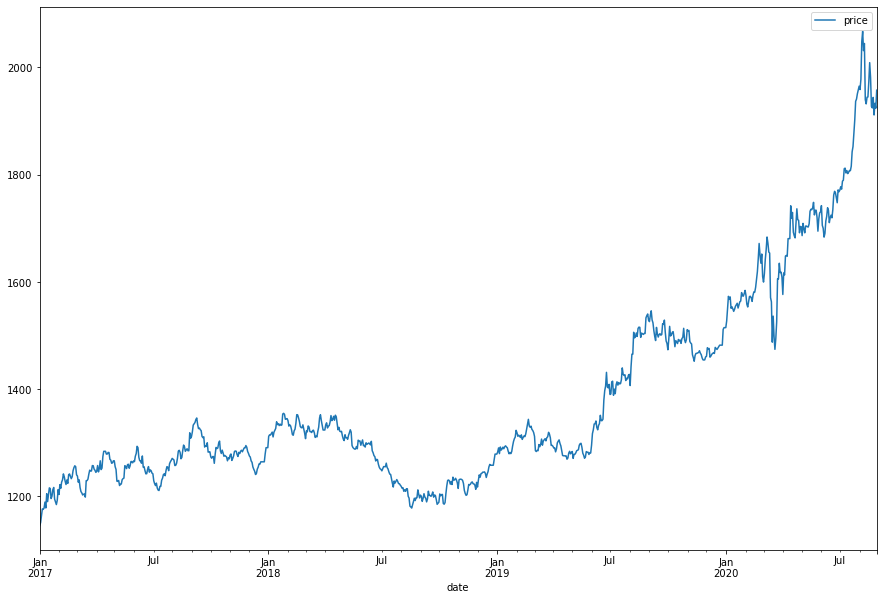

In [5]:
# Full series plot
df.plot(figsize=(15,10))

In [6]:
# Descritpives of gold price data
df.describe()

,price
count,955.000000
mean,1379.345445
std,184.347094
min,1145.900000
25%,1255.600000
50%,1303.000000
75%,1484.700000
max,2067.200000


In [59]:
# Original split-date on original 2015-2020 series
# split_date = pd.Timestamp('2019-05-23') 

In [74]:
# Original split-date on new 2017-2020 series
#Discarded since volatility in gold prices began way ahead
# split_date = pd.Timestamp('2019-12-31') 

In [7]:
#Final split-data on 2017-2020 series
split_date = pd.Timestamp('2020-04-16') 

In [8]:
# Train - test data selection
train = df.loc[:split_date, ['price']]
test = df.loc[split_date:, ['price']]

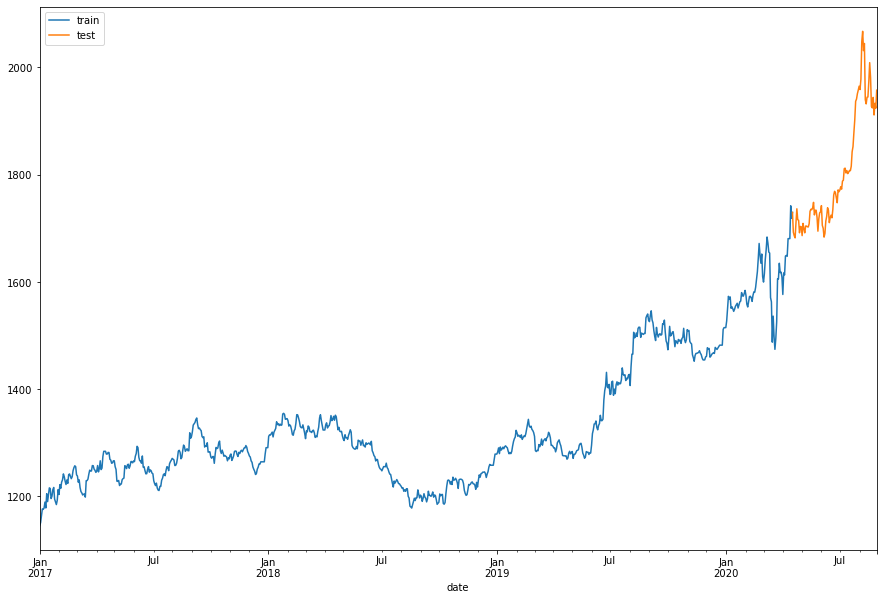

In [9]:
# Train - test plot
ax = train.plot()
test.plot(ax=ax, figsize=(15,10))
plt.legend(['train', 'test'])

In [10]:
# Scaling variables for procedure, using MinMaxScaler

sc = MinMaxScaler()

train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [11]:
# First 6 train scaled records
train_sc[:6]

array([[0.        ],
       [0.00855705],
       [0.03087248],
       [0.05167785],
       [0.05033557],
       [0.05469799]])

In [12]:
# First 6 train records
train[:6]

,price
date,
2017-01-02,1145.9
2017-01-03,1151.0
2017-01-04,1164.3
2017-01-05,1176.7
2017-01-06,1175.9
2017-01-09,1178.5


In [13]:
# 1 slot displacement on train and test series
X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]

In [15]:
# y_train first 6 values
y_train[:6]

array([[0.00855705],
       [0.03087248],
       [0.05167785],
       [0.05033557],
       [0.05469799],
       [0.07315436]])

In [16]:
# Transforms of X train and test data
X_train_t = X_train[:, None]
X_test_t = X_test[:, None]

In [17]:
# X_train shape
X_train_t.shape

(858, 1, 1)

In [97]:
# Original Model

# K.clear_session()
# model = Sequential()

# model.add(LSTM(4, input_shape=(1, 1)))

# model.add(Dense(1))

# model.compile(loss='mean_squared_error', optimizer='adam')

In [18]:
# Our model
# Being LSTM a RNN, we tried a great number of nodes as parameters to the model, ranginf from 4 yo 60
# We foun 40 to be the number of nodes able to minimise MSE
K.clear_session()

model = Sequential()

model.add(LSTM(40, input_shape=(1, 1)))

model.add(Dense(1))

#print(model.layers)

model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 40)                6720      
_________________________________________________________________
dense (Dense)                (None, 1)                 41        
Total params: 6,761
Trainable params: 6,761
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Calculating model fit
# Increasing the number of epochs doesn't seem to get a beter result
# We set verbose = 2, so one can see that loss doesn't get better
model.fit(X_train_t, y_train,
          epochs=10, batch_size=1, verbose=0,
          callbacks=[TqdmCallback(verbose=2)])

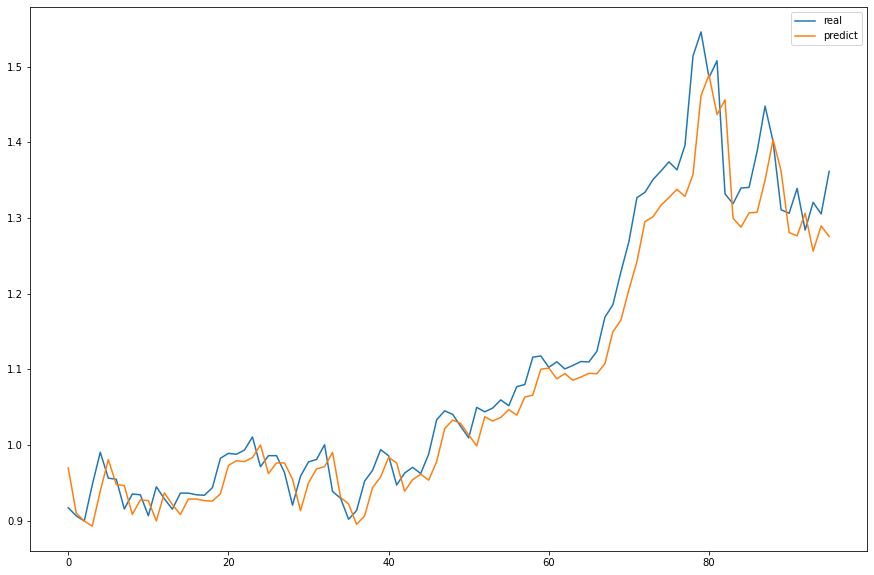

In [21]:
# Here we make the prediciton, using the above created model
y_pred = model.predict(X_test_t)
plt.figure(figsize=(15, 10))
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(['real', 'predict'])

In [23]:
# As you can see, this LSTM predicts gold prices with a great deal of acuracy, 
# if you take int accoount the great volatlity of gold prices in the last months